## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
import os
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets")
sys.path.append(os.path.realpath(".."))
sys.path.append(os.path.realpath("../GetOldTweets"))
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env4/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env4/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets']


## Fetch the Labeled PredictIt Data  
Adds ALL TA features at first. Also creates the "price_norm" metric which is close/open.

In [2]:
import ssl
import pandas as pd
import ta
from datetime import datetime, timedelta

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "../predictit_datasets/"
    filename = "{}_labeled.csv".format(symbol)

    df = pd.read_csv(path + filename)
    
    df = df.set_index("Date")


    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:current_date,WARREN:sentiment,WARREN:volume_adi,...,STABENOW:momentum_uo,STABENOW:momentum_stoch,STABENOW:momentum_stoch_signal,STABENOW:momentum_wr,STABENOW:momentum_ao,STABENOW:momentum_kama,STABENOW:momentum_roc,STABENOW:others_dr,STABENOW:others_dlr,STABENOW:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.81,0.79,0.82,0.80,768,0.8067,0.987654,2017-02-01,0.04693,-256.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,-2.949035,NaN,0.0
2017-02-02,0.80,0.79,0.80,0.79,50,0.7996,0.987500,2017-02-02,0.05167,-306.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-03,0.79,0.78,0.80,0.78,592,0.7813,0.987342,2017-02-03,0.07868,-898.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-04,0.78,0.78,0.79,0.79,10,0.7900,1.012821,2017-02-04,0.14822,-888.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-05,0.79,0.79,0.80,0.80,6,0.7950,1.012658,2017-02-05,-0.01526,-882.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0


## Plot the closing prices for all the markets

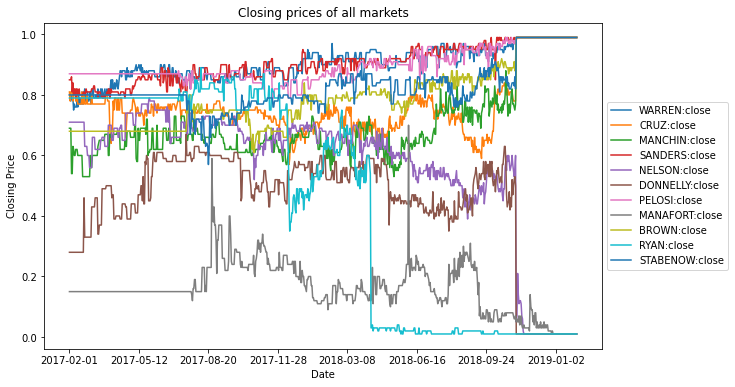

In [4]:
import matplotlib.pyplot as plt
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [5]:
#Copy it over cause of variable names
subset_data = all_data

## Define The Exchange

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [6]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define "External Data Feed". This is where you specify custom features

In [7]:
#Select only the TA features to keep
features_to_keep = ["price_norm", "sentiment", "volume", "trend_cci", "momentum_rsi"]
feature_data = subset_data.loc[:, [(any(word in name for word in features_to_keep)) for name in subset_data.columns]]

#Remove any extra volume columns
feature_data = feature_data[feature_data.columns.drop(list(feature_data.filter(regex='volume_')))]

feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:sentiment,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:sentiment,CRUZ:trend_cci,CRUZ:momentum_rsi,...,RYAN:volume,RYAN:price_norm,RYAN:sentiment,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:sentiment,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,768,0.987654,0.04693,NaN,100.00000,1411,0.931034,0.21082,NaN,100.000000,...,0,1.0,-0.14476,NaN,100.0,0,1.0,0.095790,NaN,100.0
2017-02-02,50,0.987500,0.05167,-66.666667,0.00000,924,0.962963,0.06047,-66.666667,0.000000,...,0,1.0,-0.03245,NaN,100.0,0,1.0,-0.010530,NaN,100.0
2017-02-03,592,0.987342,0.07868,-87.500000,0.00000,25,1.038462,0.14213,-33.333333,51.851852,...,0,1.0,-0.07424,NaN,100.0,0,1.0,-0.045540,NaN,100.0
2017-02-04,10,1.012821,0.14822,-66.666667,35.83181,27,1.000000,-0.05324,-30.769231,51.851852,...,0,1.0,-0.24805,NaN,100.0,0,1.0,0.128350,NaN,100.0
2017-02-05,6,1.012658,-0.01526,41.666667,53.69863,1,1.000000,-0.12315,27.027027,51.851852,...,0,1.0,0.03573,NaN,100.0,0,1.0,-0.033814,NaN,100.0


In [8]:
#Normalize the technical features
features_to_norm = ["volume", "trend_cci", "momentum_rsi"]
cols_to_norm = [name for name in feature_data.columns if any(word in name for word in features_to_norm) ]
feature_data[cols_to_norm] = feature_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#Fill any Nan in trend CCI with zeroes. (Do this AFTER normalization)
feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]] = feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]].fillna(value=0)


feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:sentiment,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:sentiment,CRUZ:trend_cci,CRUZ:momentum_rsi,...,RYAN:volume,RYAN:price_norm,RYAN:sentiment,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:sentiment,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.027972,0.987654,0.04693,0.000000,1.000000,0.004214,0.931034,0.21082,0.000000,1.000000,...,0.0,1.0,-0.14476,0.0,1.0,0.0,1.0,0.095790,0.0,1.0
2017-02-02,0.001821,0.987500,0.05167,0.408956,0.000000,0.002760,0.962963,0.06047,0.446946,0.000000,...,0.0,1.0,-0.03245,0.0,1.0,0.0,1.0,-0.010530,0.0,1.0
2017-02-03,0.021562,0.987342,0.07868,0.378923,0.000000,0.000075,1.038462,0.14213,0.482164,0.518519,...,0.0,1.0,-0.07424,0.0,1.0,0.0,1.0,-0.045540,0.0,1.0
2017-02-04,0.000364,1.012821,0.14822,0.408956,0.358318,0.000081,1.000000,-0.05324,0.484873,0.518519,...,0.0,1.0,-0.24805,0.0,1.0,0.0,1.0,0.128350,0.0,1.0
2017-02-05,0.000219,1.012658,-0.01526,0.565126,0.536986,0.000003,1.000000,-0.12315,0.545938,0.518519,...,0.0,1.0,0.03573,0.0,1.0,0.0,1.0,-0.033814,0.0,1.0


In [9]:
#Add "Streams" for all my external added features.
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(feature_data[name])) for name in feature_data.columns]
    

In [10]:
#Then create the Feed from it
external_feed = DataFeed([predictit_ns])
external_feed.next()

{'predictit:/WARREN:volume': 0.027972027972027972,
 'predictit:/WARREN:price_norm': 0.9876543209876544,
 'predictit:/WARREN:sentiment': 0.04693000000000001,
 'predictit:/WARREN:trend_cci': 0.0,
 'predictit:/WARREN:momentum_rsi': 1.0,
 'predictit:/CRUZ:volume': 0.004214456391875746,
 'predictit:/CRUZ:price_norm': 0.9310344827586208,
 'predictit:/CRUZ:sentiment': 0.21081999999999998,
 'predictit:/CRUZ:trend_cci': 0.0,
 'predictit:/CRUZ:momentum_rsi': 1.0,
 'predictit:/MANCHIN:volume': 0.0,
 'predictit:/MANCHIN:price_norm': 1.0,
 'predictit:/MANCHIN:sentiment': 0.14649,
 'predictit:/MANCHIN:trend_cci': 0.0,
 'predictit:/MANCHIN:momentum_rsi': 1.0,
 'predictit:/SANDERS:volume': 0.0,
 'predictit:/SANDERS:price_norm': 1.0,
 'predictit:/SANDERS:sentiment': -0.028980000000000027,
 'predictit:/SANDERS:trend_cci': 0.0,
 'predictit:/SANDERS:momentum_rsi': 1.0,
 'predictit:/NELSON:volume': 0.0,
 'predictit:/NELSON:price_norm': 1.0,
 'predictit:/NELSON:sentiment': 0.010239999999999987,
 'predictit:

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [11]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## First Launch Ray. 
This is where you define our training "Trading Enviroment," which includes things such as the action scheme, the reward scheme, the window size, and whether or not to use the "interal feed" (internal data feed has all the price data from the wallets and the networth of the portfolio).

In [12]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader"
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [13]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [14]:
# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=external_feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="risk-adjusted",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


#ray.init(ignore_reinit_error=True, local_mode=True)

## Train using Tune

In [15]:
#Implement Custom neural network model
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.agents.dqn.distributional_q_model import DistributionalQModel
from ray.rllib.utils import try_import_tf

tf = try_import_tf()

class CNNModel(DistributionalQModel):
    """Custom model for DQN."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name, **kw):
        super(CNNModel, self).__init__(
            obs_space, action_space, num_outputs, model_config, name, **kw)

        # Define neural net layers
        self.base_model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=obs_space.shape),
            tf.keras.layers.Conv1D(filters=64, kernel_size=6, padding="same", activation="tanh"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="tanh"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_outputs, activation="sigmoid"),
            tf.keras.layers.Dense(num_outputs, activation="softmax")
        ])
        
        self.register_variables(self.base_model.variables)

    # Implement the core forward method
    def forward(self, input_dict, state, seq_lens):
        model_out = self.base_model(input_dict["obs"])
        return model_out, state
    
ModelCatalog.register_custom_model("cnn_model", CNNModel)

In [16]:
# Population based training
from ray.tune.schedulers import PopulationBasedTraining
import random

pbt = PopulationBasedTraining(
    time_attr="time_total_s",
    metric="episode_reward_mean",
    mode="max",
    perturbation_interval=240, #Every 10,000 steps, consider changing learning rate
    hyperparam_mutations={
        "lr": lambda: random.uniform(.00001, .01),
        #"train_batch_size": lambda: random.uniform(10, 100),
    } 
)

In [ ]:
analysis = tune.run(
        "DQN",
        name = "DQN32-custom_model",
        #scheduler=pbt, #Use Population Based Training
        #num_samples=4, #Number of different hyperparameters to sample
        #reuse_actors=True,
        checkpoint_freq = 50,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 10000000,
        },
        config={
            "env": "ray_trading_env",
            "lr": .0004,  # try different lrs
            "num_workers": 6,  # parallelism,
            #"eager": "true",
            "model": {
                "custom_model": "cnn_model"
            }
        },
        
    )

2020-03-22 15:41:05,668	INFO resource_spec.py:212 -- Starting Ray with 3.61 GiB memory available for workers and up to 1.83 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-22 15:41:05,949	WARNING services.py:850 -- Redis failed to start, retrying now.
2020-03-22 15:41:07,255	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


Trial name,status,loc
DQN_ray_trading_env_135d82da,RUNNING,


(pid=7623) 2020-03-22 15:41:15,217	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=7623) 2020-03-22 15:41:16,868	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=7623) /Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env4/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=7623)   obj = yaml.load(type_)
(pid=7623) 2020-03-22 15:41:18,897	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=7617) /Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env4/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read h

(pid=7623) /Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env4/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
(pid=7623)   out=out, **kwargs)
(pid=7623) /Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env4/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
(pid=7623)   ret = ret.dtype.type(ret / rcount)
Result for DQN_ray_trading_env_135d82da:
  custom_metrics: {}
  date: 2020-03-22_15-41-45
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ed1ffc0075ab4a639153db76b0397ed1
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_135d82da,RUNNING,192.168.0.175:7623,nan,26.8515,1008,1


Result for DQN_ray_trading_env_135d82da:
  custom_metrics: {}
  date: 2020-03-22_15-42-01
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ed1ffc0075ab4a639153db76b0397ed1
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 11.066
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.06515440344810486
        mean_q: 0.04437866806983948
        mean_td_error: 3789126.25
        min_q: 0.02600480429828167
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 1344
    num_target_updates: 4
    opt_peak_throughput: 2891.657
    opt_samples: 32.0
    replay_time_ms: 4.592
    sample_time_ms: 324.825
    update_time_ms: 13.303
  iterations_since_restore: 2
  node_ip: 192.168.0.175
  num_h

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_135d82da,RUNNING,192.168.0.175:7623,nan,42.5919,2016,2


In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

In [ ]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [ ]:
#Only need to call this if tune.run() wasn't used.
ray.init()

In [16]:
#First set up the trainer (which should really be called the "tester"). 
#Use only 1 worker for this cause we don't need more

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-21 02:21:24,947	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-21 02:21:25,021	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-03-21 02:21:27,254	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

(pid=88484) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=88484) 
(pid=88484) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=88484) 


In [ ]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_100/checkpoint-100"))

In [29]:
#Do it with an absolute path
trainer.restore(checkpoint_path="/Users/jasonfiacco/ray_results/DQN31/DQN_ray_trading_env_8b8858b4_0_2020-03-20_19-14-277svpi90v/checkpoint_500/checkpoint-500")


2020-03-21 02:25:51,698	WARNING trainable.py:210 -- Getting current IP.
2020-03-21 02:25:51,699	INFO trainable.py:416 -- Restored on 192.168.0.175 from checkpoint: /Users/jasonfiacco/ray_results/DQN31/DQN_ray_trading_env_8b8858b4_0_2020-03-20_19-14-277svpi90v/checkpoint_500/checkpoint-500
2020-03-21 02:25:51,700	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': 504000, '_time_total': 7199.524930715561, '_episodes_total': 702}


## Testing (test on a new or the same environment)

In [30]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='risk-adjusted',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

In [39]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

[2020-03-21 2:29:07 AM] Step: 1
[2020-03-21 2:29:10 AM] Step: 101
[2020-03-21 2:29:13 AM] Step: 201
[2020-03-21 2:29:15 AM] Step: 301
[2020-03-21 2:29:18 AM] Step: 401
[2020-03-21 2:29:21 AM] Step: 501
[2020-03-21 2:29:24 AM] Step: 601
[2020-03-21 2:29:26 AM] Step: 701
Cumulative reward:  -48757063.08744183


## Plot the Results

In [40]:
#Set all of the formatting parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

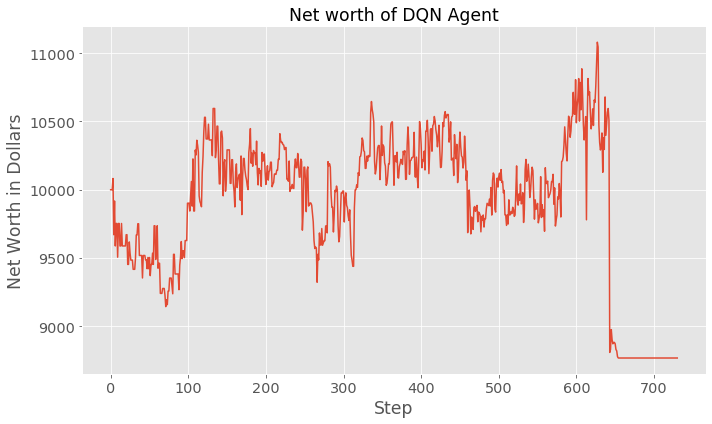

In [43]:
#Plot the networth
#dates = subset_data.index
plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(portfolio.performance.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent")
plt.show()

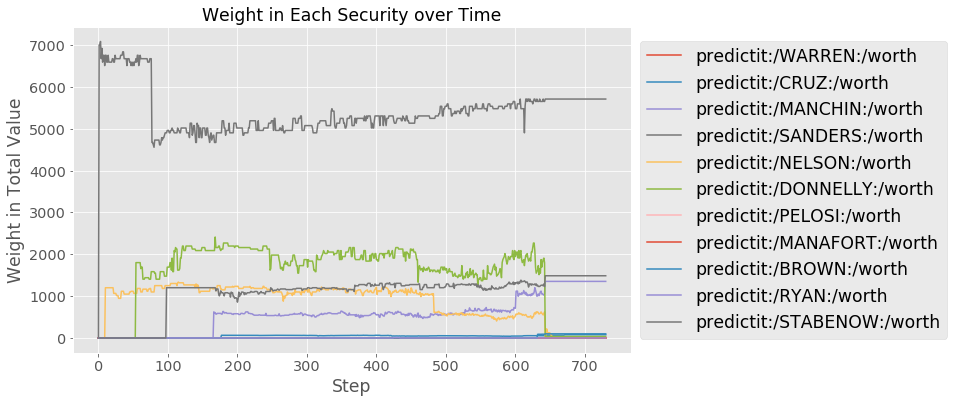

In [44]:
### Plot the total balance in each type of item
#First get the worth columns
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]

#Now plot
weights.iloc[:,:].plot(figsize=(10, 6))
plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()


## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)